### Tarea Bonus
#### Simulación Digital

2170688 - Brayan Rodolfo Barajas Ochoa

Para simular la cinématica de una partícula en 2D se necesita tener en cuenta tanto la componente en x como en y, por lo que se puede tener posición, velocidad y aceleración para cada una de estas.

En el ejercicio planteado, se observa que no hay componente de aceleración en x. Teniendo en cuenta esto, se podría describir este sistema por medio de las siguientes ecuaciones de diferencia: 

- $s_x(t+dt)= s_x(t) + dt*v_x(t) + otros$
- $s_y(t+dt)= s_y(t) + dt*v_y(t) + otros$
- $v_y(t+dt) = v_y(t) + dt*a_y(t) + otros$

In [1]:
#Se importan las librerías que se utilizan
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [20]:
#Delta de tiempo
delta = 0.01
#Tiempo total de duración
t_dur = 20

#Número de pasos
n_steps = int(t_dur/delta)
print(n_steps)

#Vector de tiempo
t=np.linspace(0,t_dur,n_steps+1)
#Aceleración en y
ay = np.ones_like(t)*-9.8 #Gravedad 9.8 m/s^2

2000


In [21]:
#Variables que se pueden ajustar al sistema
x_0 = 0 #@param {type:"number"}
y_0 = 10 #@param {type:"number"}
vx_0 = -2 #@param {type:"number"}
vy_0 =  26#@param {type:"number"}
left_limit = -10 #@param {type:"number"}
right_limit = 10 #@param {type:"number"}
top_limit = 40 #@param {type:"number"}
bottom_limit = 0 #@param {type:"number"}
delta_t = delta

#Vectores donde se almacenarán todos los valores de velocidad y posición
all_vx = np.zeros(n_steps+1)
all_vy = np.zeros(n_steps+1)
all_x = np.zeros(n_steps+1)
all_y = np.zeros(n_steps+1)           

#Inicialización de variables
x,y,vx,vy=x_0,y_0,vx_0,vy_0

for i in range(n_steps):
    #Ecuaciones de diferencia
    x=x + vx*delta_t
    y=y + vy*delta_t
    vy = vy + ay[i]*delta_t
    #Condición de rebote en límites verticales
    if x<=left_limit or x>=right_limit: 
        vx=-vx*0.7 #Disminución de velocidad en x
        x = left_limit if x<=left_limit else right_limit #Restricción para no pasar de los límites
    #Condición de rebote en límites horizontales 
    if y<=bottom_limit or y>=top_limit:
        vy=-vy*0.7 #Disminución de velocidad en x
        y=bottom_limit if y<=bottom_limit else top_limit #Restricción para no pasar de los límites

    #Guardar los valores en cad momento de tiempo
    all_vx[i] = vx
    all_vy[i] = vy
    all_x[i] = x
    all_y[i] = y 

A continuación se muestran las gráficas, no se muestra la de aceleración vs tiempo debido a que es constante

Text(0.5, 0.98, 'Dinámica del sistema')

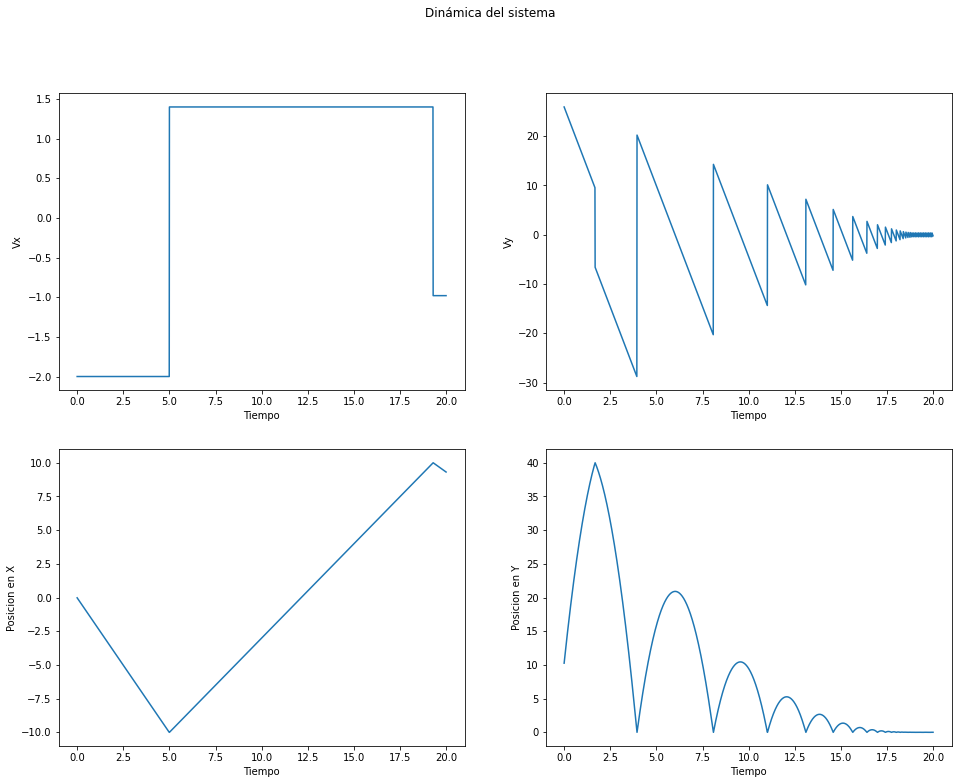

In [22]:
plt.figure(figsize=(16,12))

#Gráfica de Velocidad en x vs Tiempo
plt.subplot(2,2,1)
plt.plot(t[:-1], all_vx[:-1])
plt.ylabel("Vx")
plt.xlabel("Tiempo")

#Gráfica de Velocidad en y vs Tiempo
plt.subplot(2,2,2)
plt.plot(t[:-1], all_vy[:-1])
plt.ylabel("Vy")
plt.xlabel("Tiempo")

#Gráfica de Posición en x vs Tiempo
plt.subplot(2,2,3)
plt.plot(t[:-1], all_x[:-1])
plt.ylabel("Posicion en X")
plt.xlabel("Tiempo")

#Gráfica de Posición en y vs Tiempo
plt.subplot(2,2,4)
plt.plot(t[:-1], all_y[:-1])
plt.ylabel("Posicion en Y")
plt.xlabel("Tiempo")

plt.plot()

plt.suptitle('Dinámica del sistema')

Ahora, se mostrará la animación de la simulación realizada.

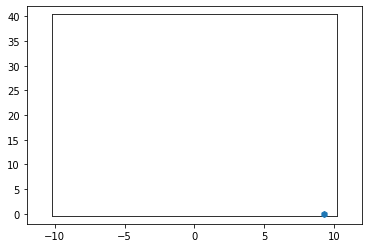

In [26]:
fig, ax = plt.subplots()

ax.set_xlim((left_limit-2, right_limit+2))
ax.set_ylim((bottom_limit-2, top_limit+2))
ax.vlines(left_limit-0.2, ymin=bottom_limit-0.4, ymax=top_limit+0.4, lw=0.8)
ax.vlines(right_limit+0.2, ymin=bottom_limit-0.4, ymax=top_limit+0.4, lw=0.8)
ax.plot([left_limit-0.2, right_limit+0.2],[bottom_limit-0.4, bottom_limit-0.4], color="black", lw=0.8)
ax.plot([left_limit-0.2, right_limit+0.2],[top_limit+0.4 ,top_limit+0.4], color="black", lw=0.8)
line, = ax.plot([], [], lw=2)


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = [all_x[i]]
    y = [all_y[i]]
    
    line.set_marker('h')
    line.set_data(x, y)

    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=10, blit=True)

HTML(anim.to_html5_video())
